In [1]:
pip install kaggle

In [44]:
import pandas as pd
import plotnine as p9
import plotly.express as px
import matplotlib.pyplot as plt


In [3]:
from google.colab import userdata
import os

os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

## Load the dataset

In [4]:
!kaggle datasets download -d unsdsn/world-happiness

  0% 0.00/36.8k [00:00<?, ?B/s]
100% 36.8k/36.8k [00:00<00:00, 3.67MB/s]


In [5]:
!unzip world-happiness.zip

Archive:  world-happiness.zip
  inflating: 2015.csv                
  inflating: 2016.csv                
  inflating: 2017.csv                
  inflating: 2018.csv                
  inflating: 2019.csv                


In [6]:
import pandas as pd
df = pd.read_csv('2016.csv')

## Data Preprocessing and EDA


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

In [8]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Lower Confidence Interval        0
Upper Confidence Interval        0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596
...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Benin,Sub-Saharan Africa,153,3.484,3.404,3.564,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812
153,Afghanistan,Southern Asia,154,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558
154,Togo,Sub-Saharan Africa,155,3.303,3.192,3.414,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540
155,Syria,Middle East and Northern Africa,156,3.069,2.936,3.202,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789


In [11]:
cleaned_df = df

In [12]:
cleaned_df

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596
...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Benin,Sub-Saharan Africa,153,3.484,3.404,3.564,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812
153,Afghanistan,Southern Asia,154,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558
154,Togo,Sub-Saharan Africa,155,3.303,3.192,3.414,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540
155,Syria,Middle East and Northern Africa,156,3.069,2.936,3.202,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789


In [13]:
# Correlation analysis
correlation_matrix = cleaned_df.corr()
print(correlation_matrix)

                               Happiness Rank  Happiness Score  \
Happiness Rank                       1.000000        -0.995743   
Happiness Score                     -0.995743         1.000000   
Lower Confidence Interval           -0.994928         0.999485   
Upper Confidence Interval           -0.995525         0.999474   
Economy (GDP per Capita)            -0.793577         0.790322   
Family                              -0.733276         0.739252   
Health (Life Expectancy)            -0.767991         0.765384   
Freedom                             -0.557169         0.566827   
Trust (Government Corruption)       -0.387102         0.402032   
Generosity                          -0.145369         0.156848   
Dystopia Residual                   -0.542616         0.543738   

                               Lower Confidence Interval  \
Happiness Rank                                 -0.994928   
Happiness Score                                 0.999485   
Lower Confidence Interval  

<ipython-input-13-ebfd5aa8e7f8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


## Visualizations with Plotnine and Plotly

/usr/local/lib/python3.10/dist-packages/plotnine/guides/guides.py:197: PlotnineWarning: Cannot generate legend for the 'fill' aesthetic. Make sure you have mapped a variable to it


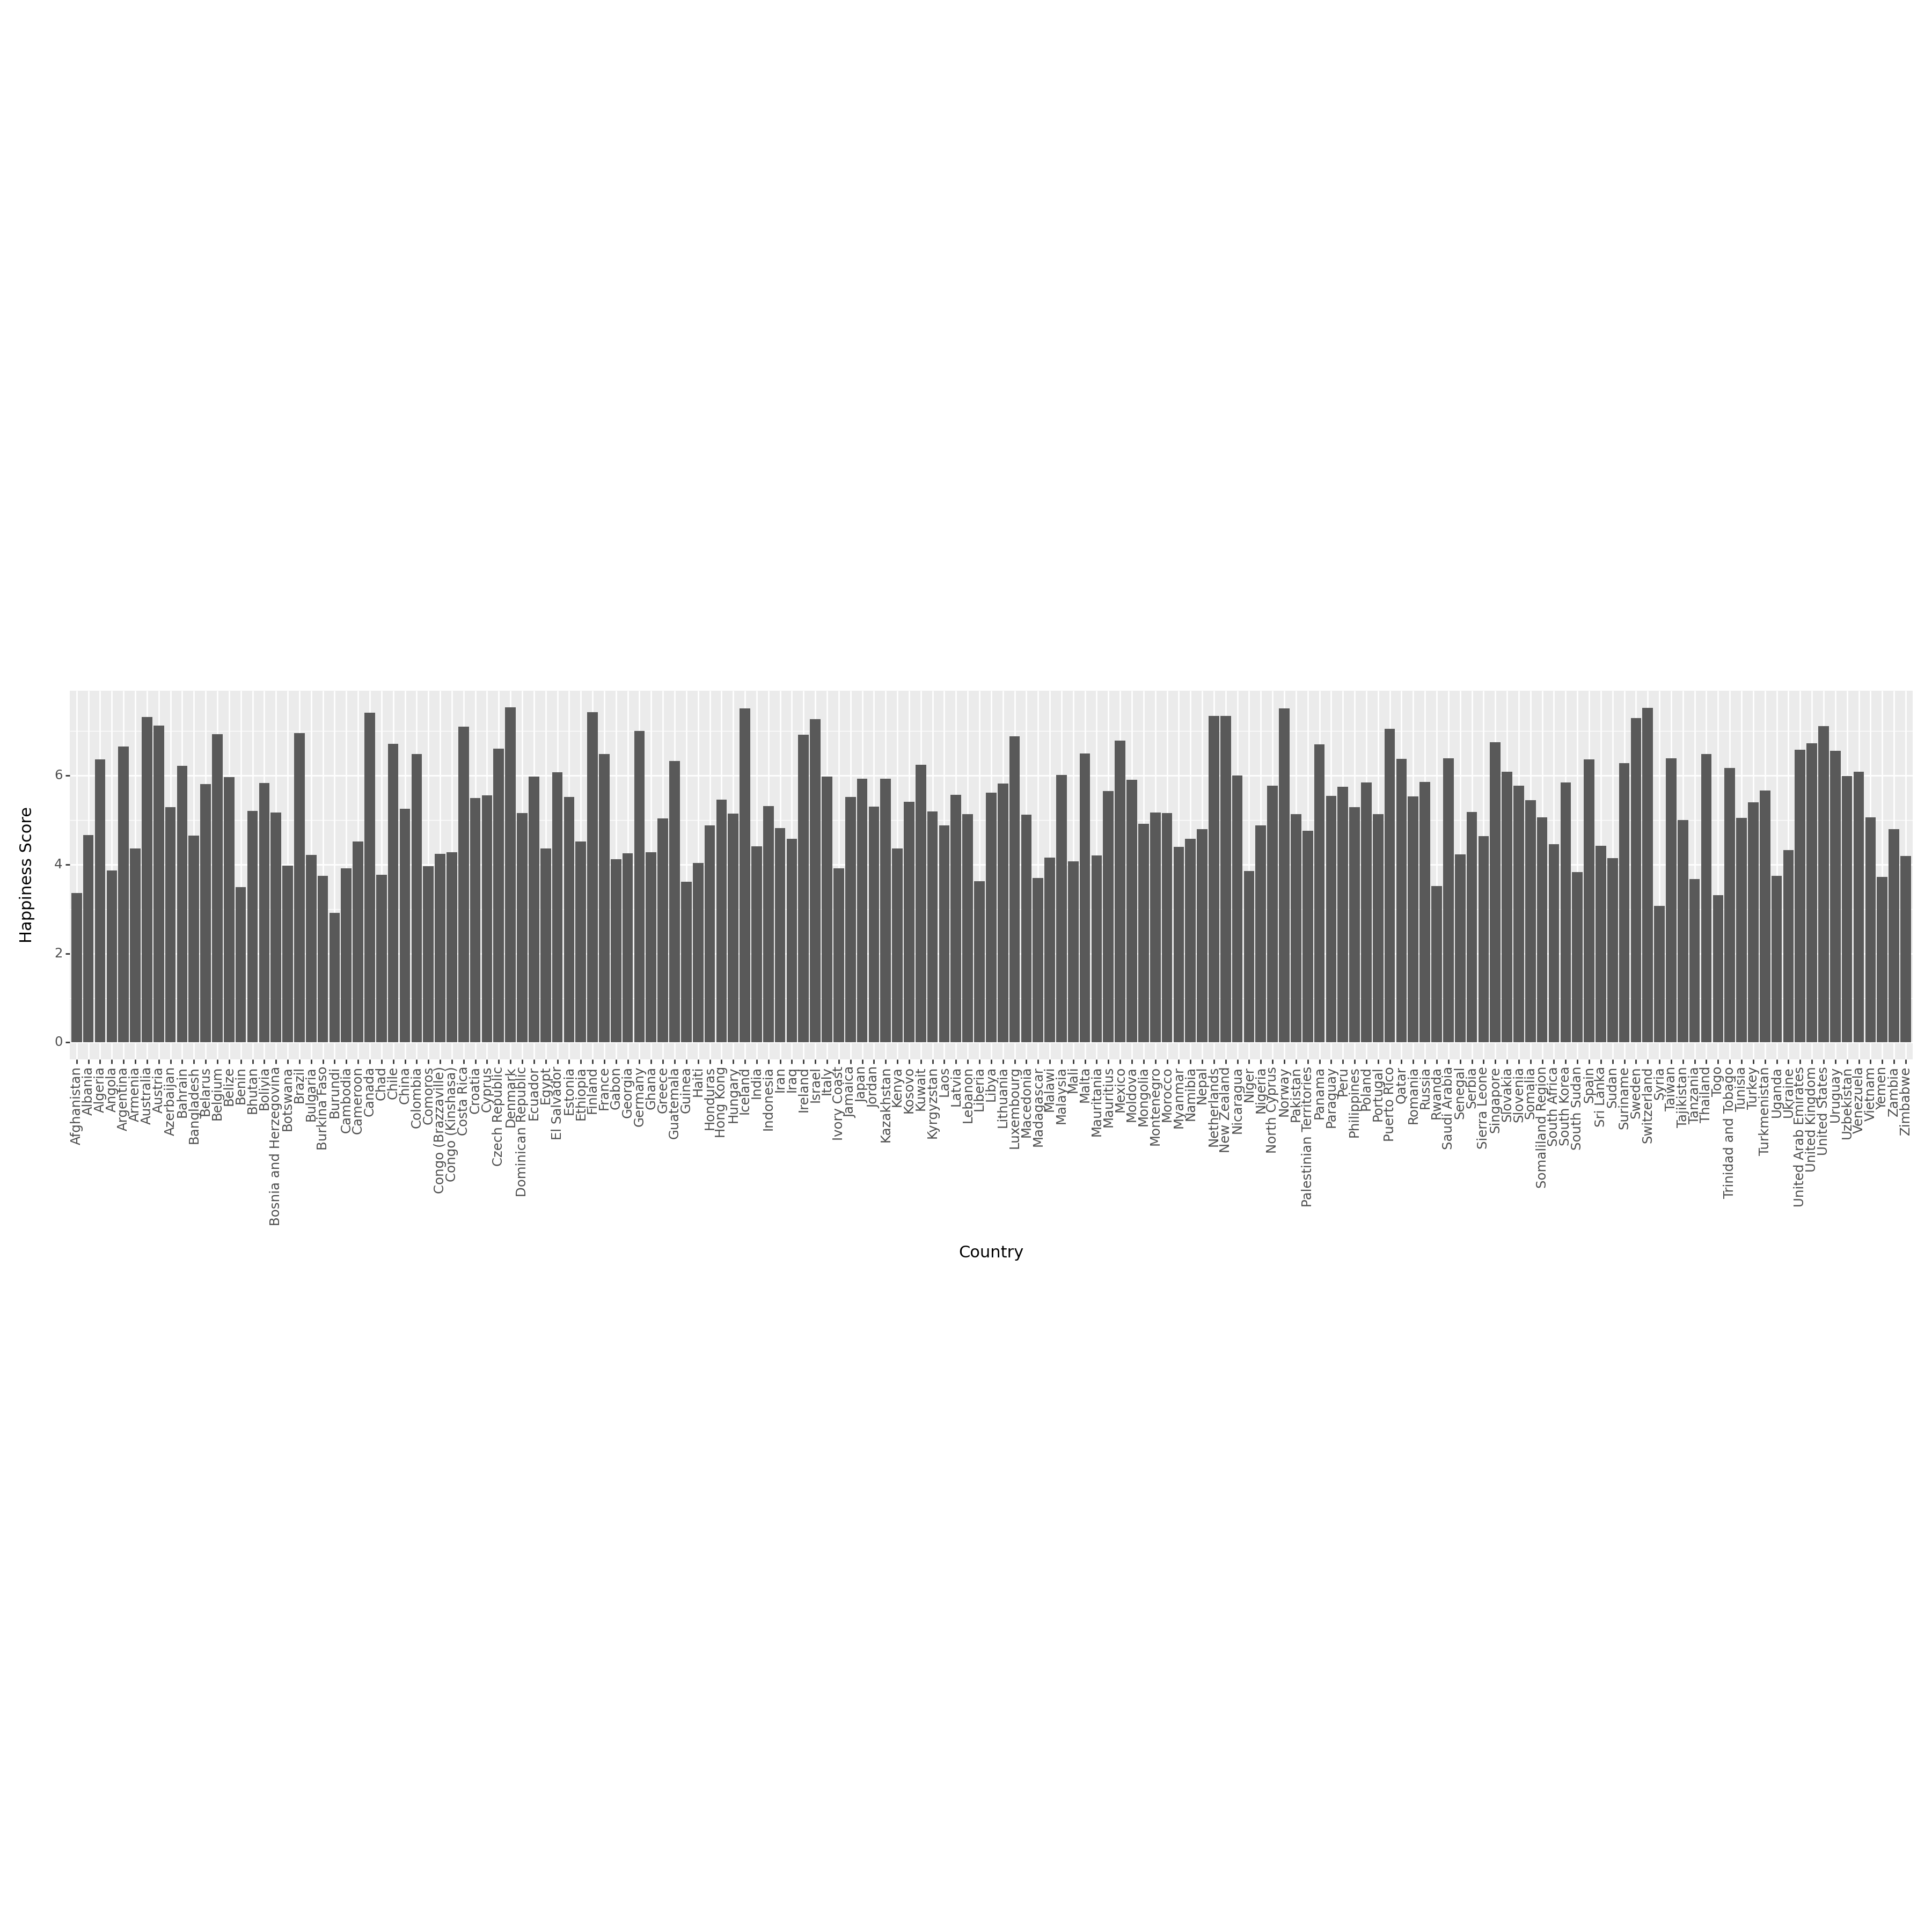

<Figure Size: (1800 x 1800)>

In [14]:
# Global Happiness Scores: Create a bar chart of happiness scores across countries.

(
    p9.ggplot(cleaned_df, p9.aes("Country", "Happiness Score"))
    + p9.geom_bar(stat="identity")
    + p9.scale_fill_manual(values=["#8dd3c7"])
    + p9.theme(axis_text_x=p9.element_text(angle=90))
    + p9.theme(figure_size=(18, 18))
    + p9.theme(aspect_ratio=0.2)

)


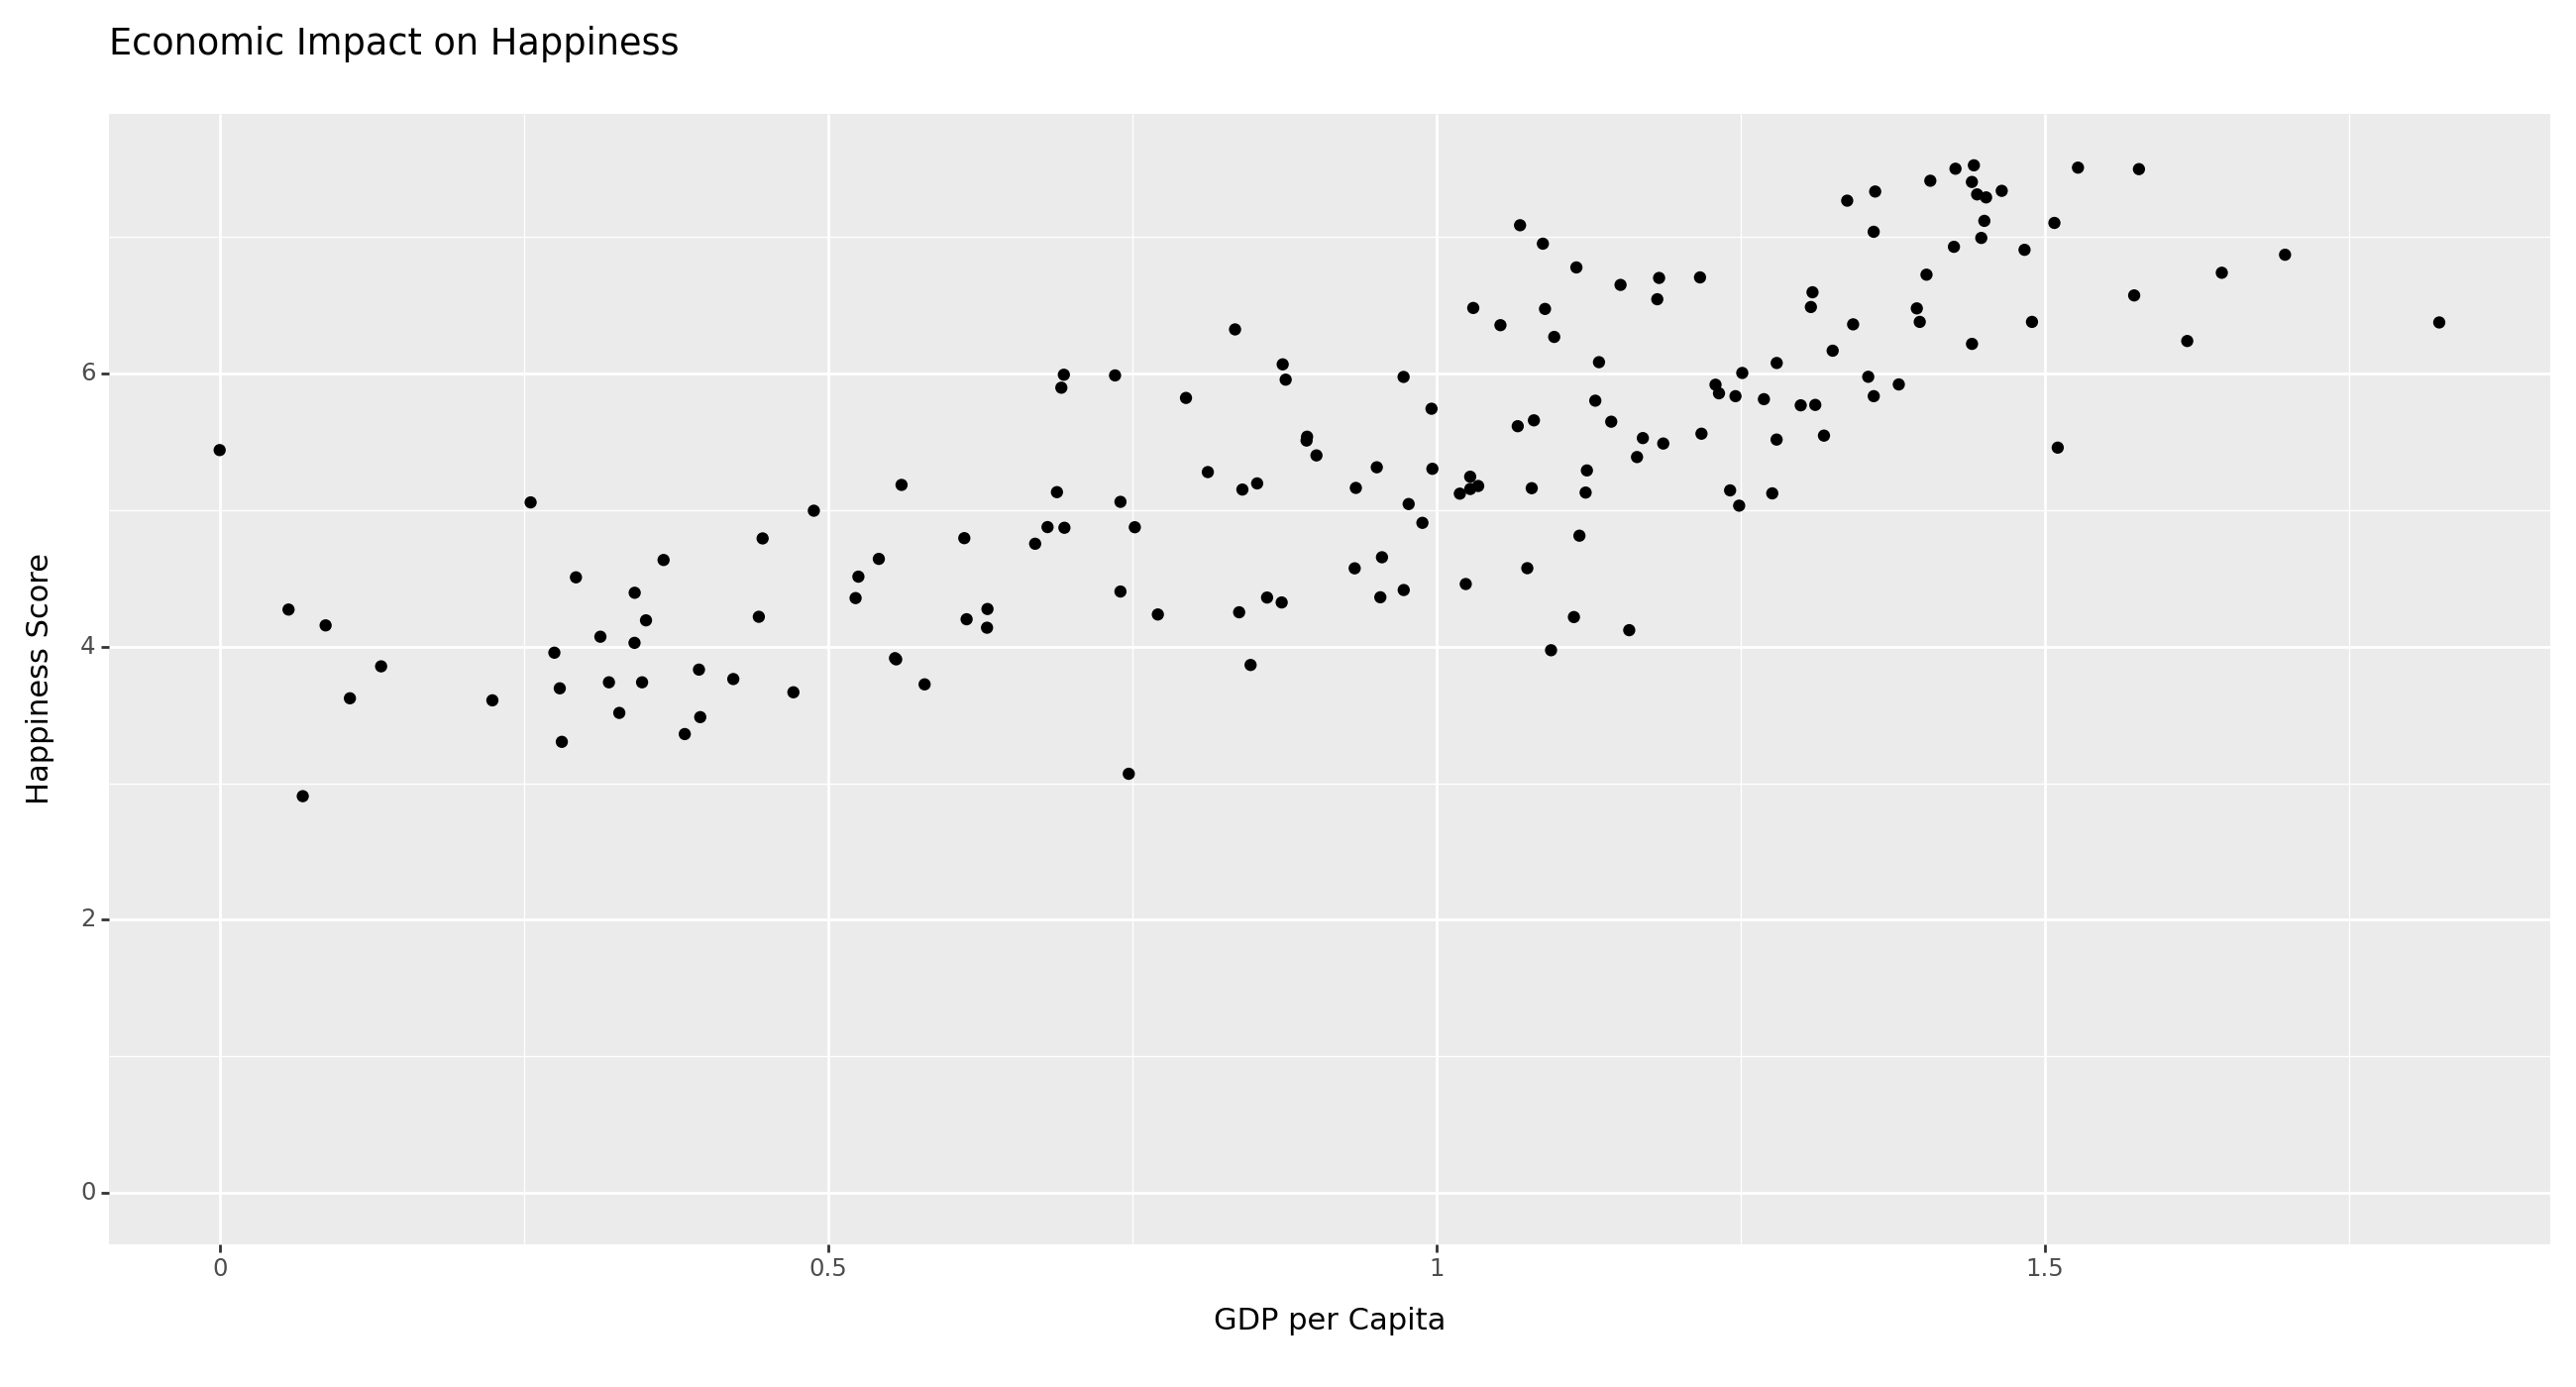

<Figure Size: (1300 x 700)>

In [15]:
# Economic Impact on Happiness: Use a scatter plot to explore the relationship between GDP per capita and happiness scores.

(
    p9.ggplot(cleaned_df, p9.aes(x="Economy (GDP per Capita)", y="Happiness Score"))
    + p9.geom_point()
    + p9.theme(figure_size=(13, 7))
    + p9.scale_y_continuous(limits=(0, max(cleaned_df['Happiness Score'])))
    + p9.scale_x_continuous(limits=(0, max(cleaned_df['Economy (GDP per Capita)'])))
    + p9.labs(x="GDP per Capita", y="Happiness Score", title="Economic Impact on Happiness")
)



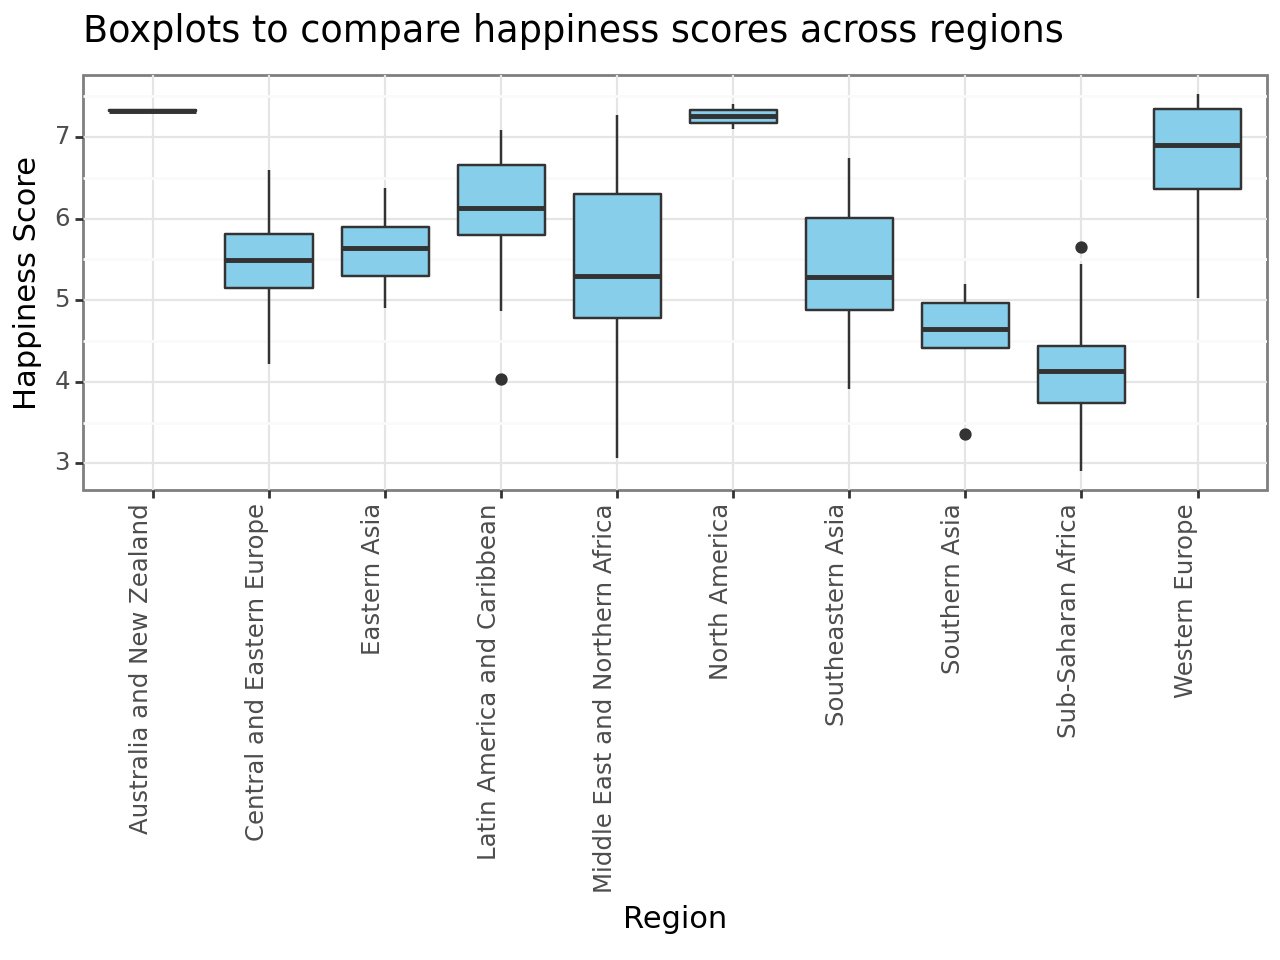

In [16]:
# Generate boxplots to compare happiness scores across regions.

p9.boxplot = (
    p9.ggplot(df, p9.aes(x='Region', y='Happiness Score')) +
    p9.geom_boxplot(fill='skyblue') +
    p9.theme_bw() +
    p9.theme(axis_text_x = p9.element_text(angle = 90, hjust = 1))+
    p9.ggtitle('Boxplots to compare happiness scores across regions')
    )
p9.boxplot.draw()


<ipython-input-26-a2cee52088ba>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


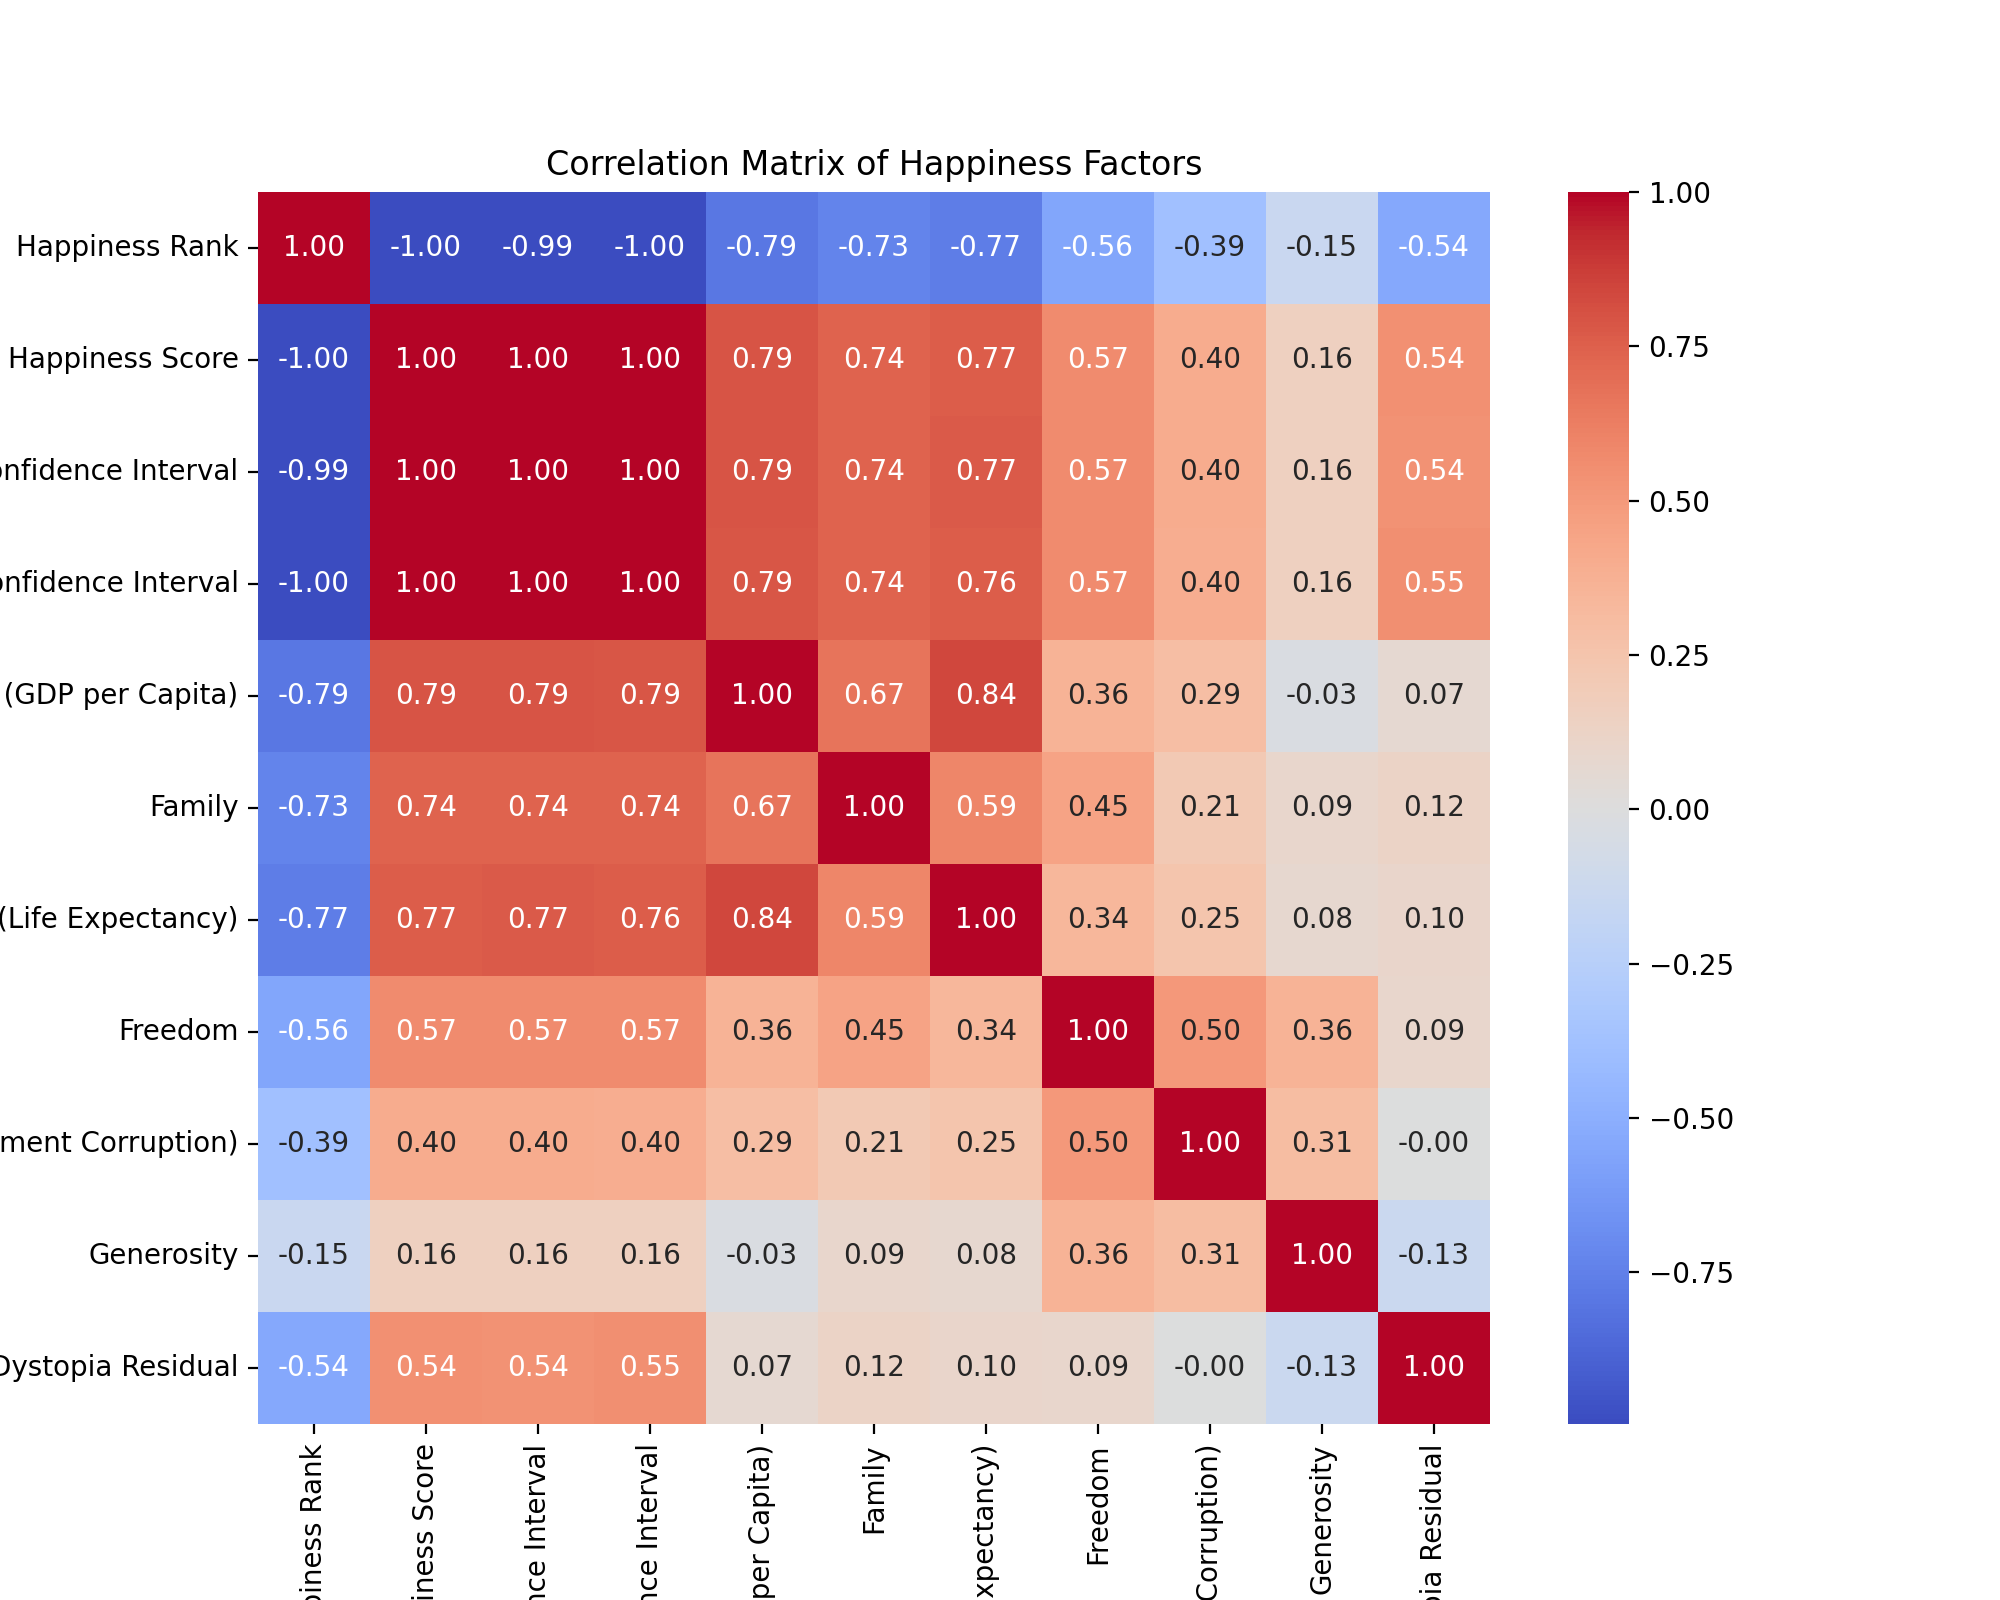

In [26]:
# Visualize the correlation between different factors using a heatmap.

import seaborn as sns

# Create the correlation matrix
correlation_matrix = cleaned_df.corr()

# Set up the heatmap
fig, ax = plt.subplots(figsize=(10, 8))

# Generate the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, ax=ax)

# Add a title and labels
plt.title("Correlation Matrix of Happiness Factors")
plt.xlabel("Factors")
plt.ylabel("Factors")

# Show the plot
plt.show()


In [48]:
fig = px.choropleth(df,
                    locations='Country',
                    locationmode='country names',
                    color='Happiness Score',
                    color_continuous_scale='Viridis',
                    range_color=(0, df['Happiness Score'].max()),# creating a scale
                    title='Happiness Scores Across Countries',
                    hover_name='Country',
                    hover_data='Happiness Score',
                    labels={'Score': 'Happiness Score'}
                   )

fig.update_geos(projection_type="orthographic", showcoastlines=True, coastlinecolor="Black", showland=True, landcolor="LightGreen", showocean=True, oceancolor="LightBlue")
fig.show()

In [49]:
# Visualizations with Plotly: Plot an interactive scatter plot exploring relationships between various factors like health, freedom, and happiness.

fig = px.scatter(cleaned_df,
                 x="Health (Life Expectancy)",
                 y="Freedom",
                 size="Happiness Score",
                 color="Region",
                 hover_name="Country",
                 title="Interactive Scatter Plot: Exploring Relationships between Health, Freedom, and Happiness")
fig.update_layout(legend_orientation="h", legend=dict(x=0, y=1, traceorder="normal"),
                  margin=dict(l=0, r=0, t=30, b=0))
fig.show()


In [91]:
df2 = pd.read_csv('2019.csv')

In [92]:
df2['Flipped_rank'] = (180 - df2['Overall rank'])

In [93]:
# prompt: Visualizations with Plotly: Use a bubble chart to visualize the impact of social support and generosity on happiness scores, with bubble size representing country population.

fig = px.scatter(df2,
                 x="Social support",
                 y="Generosity",
                 size= "Flipped_rank",
                 color="Score",
                 hover_name="Country or region",
                 title="Bubble Chart: Social Support, Generosity, and Happiness")
fig.update_layout(legend_orientation="h", legend=dict(x=0, y=1, traceorder="normal"),
                  margin=dict(l=0, r=0, t=30, b=0))
fig.show()


## Advanced Analysis

In [114]:
df['Flipped_rank'] = (300 - df['Happiness Rank'])

In [115]:
#  Perform a multi-variable analysis and visualize it using an interactive Plotly chart.

# Create a multi-variable analysis model
model = px.scatter_3d(df,
                 x="Happiness Score",
                 y="Health (Life Expectancy)",
                 z="Freedom",
                 size = "Flipped_rank",
                 color="Region",
                 hover_name="Country",
                 title="3D Scatter Plot: Multi-Variable Analysis of Happiness Factors")

# Set up the layout
model.update_layout(legend_orientation="h", legend=dict(x=0, y=1, traceorder="normal"),
                  margin=dict(l=0, r=0, t=30, b=0))

# Show the plot
model.show()


In [118]:
# Explore time-series aspects if temporal data is available, or compare with another year’s dataset.

# Load the 2019 dataset
df2 = pd.read_csv('2019.csv')
df2 = df2.rename(columns={'Country or region': 'Country'})
df2 = df2.rename(columns={'Score': 'Happiness Score'})
# Merge the two datasets
merged_df = pd.merge(df, df2, on='Country')

# Compare happiness scores across years
fig = px.bar(merged_df, x='Country', y=['Happiness Score_x', 'Happiness Score_y'], title='Happiness Score Comparison: 2016 vs. 2019',barmode='group')
fig.show()





In [117]:
# Analyze changes in happiness scores over time
merged_df['Happiness Score Change'] = merged_df['Happiness Score_y'] - merged_df['Happiness Score_x']
fig = px.scatter(merged_df, x='Country', y='Happiness Score Change', title='Change in Happiness Score from 2016 to 2019')
fig.show()
